In [98]:
# Import Libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [99]:
# Training And Testing Data Loading...
data= pd.read_csv(r'E:\IT Learning\My Projects\Data Science And ML Projects\Digit Recognizer\dataset\train.csv')
X_train= data.drop('label',axis=1)
y_train= data['label']
X_test= pd.read_csv(r'E:\IT Learning\My Projects\Data Science And ML Projects\Digit Recognizer\dataset\test.csv')

In [100]:
# Base Model Training
model= SVC(random_state=42)
model.fit(X_train,y_train)

SVC(random_state=42)

In [101]:
# Base Model Prediction
y_pred= model.predict(X_test)

In [102]:
y_pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [103]:
# Data Mean Centering / Data Standardization
scaler= StandardScaler()
scaler.fit(X_train)
X_train_trf= scaler.transform(X_train)
X_test_trf=scaler.transform(X_test)

In [104]:
# Principle Component Analysis To Reduce Dimensionality
pca= PCA(n_components=100)
pca.fit(X_train_trf)
X_train_trf=pca.transform(X_train_trf)
X_test_trf=pca.transform(X_test_trf)

In [105]:
# Final Model Prediction
model=SVC()
model.fit(X_train_trf,y_train)
y_pred= model.predict(X_test_trf)

In [144]:
test= pd.read_csv(r'E:\IT Learning\My Projects\Data Science And ML Projects\Digit Recognizer\dataset\sample_submission.csv')

In [149]:
# Add the predictions to the 'test.csv' file
test['Label'] = y_pred

# Save the modified 'test.csv' file with predictions
test.to_csv(r'E:\IT Learning\My Projects\Data Science And ML Projects\Digit Recognizer\dataset\sample_submission.csv', index=False)

In [162]:
# Just to check from testing sample
X_test.sample()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
26834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


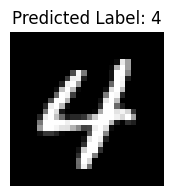

In [163]:
# Choose the specific index you want to visualize
index_to_visualize = 26834

# Extract the predicted label for the selected index
predicted_label = y_pred[index_to_visualize]

# Extract the original image data for the selected index from X_test
image_data = X_test.iloc[index_to_visualize]

# Reshape the data for visualization
image_to_show = image_data.values.reshape(28, 28)

# Plot the image
plt.figure(figsize=(2, 2))
plt.imshow(image_to_show, cmap='gray')
plt.axis('off')
plt.title(f'Predicted Label: {predicted_label}')
plt.show()
